In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('data/notebook-01.csv')
data.head()

,Site_ID,Sample_ID,Latitude_Degrees,Longitude_Degrees,Distance_to_Shore,Turbidity,Cyclone_Frequency,Date_Day,Date_Month,Date_Year,...,Ocean_Name_Atlantic,Ocean_Name_Indian,Ocean_Name_Pacific,Ocean_Name_Red Sea,Exposure_Exposed,Exposure_Sheltered,Exposure_Sometimes,Term_Type_El Niño,Term_Type_La Niña,Term_Type_Neutral
0,2501,10324336,23.163,-82.5260,8519.23,0.0287,49.90,15,9,2005,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,3467,10324754,-17.575,-149.7833,1431.62,0.0262,51.20,15,3,1991,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1794,10323866,18.369,-64.5640,182.33,0.0429,61.52,15,1,2006,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,8647,10328028,17.760,-64.5680,313.13,0.0424,65.39,15,4,2006,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,8648,10328029,17.769,-64.5830,792.00,0.0424,65.39,15,4,2006,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [3]:
cols_for_reg = data[['Latitude_Degrees',                       
'Longitude_Degrees',
'SSTA_Standard_Deviation',
'Date_Year',  
'Depth_m',                     
'Distance_to_Shore',  
'TSA_DHW',  
'ClimSST',                                                  
'Percent_Bleaching' ]]

In [4]:
cols_for_reg.head()

,Latitude_Degrees,Longitude_Degrees,Distance_to_Shore,Cyclone_Frequency,Date_Year,Depth_m,Turbidity,ClimSST,SSTA,TSA,Percent_Bleaching
0,23.163,-82.5260,8519.23,49.90,2005,10.00,0.0287,301.61,-0.46,-0.80,50.2
1,-17.575,-149.7833,1431.62,51.20,1991,14.00,0.0262,262.15,1.29,1.29,50.7
2,18.369,-64.5640,182.33,61.52,2006,7.00,0.0429,298.79,0.04,-2.64,50.9
3,17.760,-64.5680,313.13,65.39,2006,9.02,0.0424,300.16,-0.07,-2.27,50.9
4,17.769,-64.5830,792.00,65.39,2006,12.50,0.0424,300.15,0.00,-2.19,50.9


In [5]:
cols_for_reg.shape

(32678, 11)

In [6]:
cols_for_reg = cols_for_reg.drop_duplicates(keep='last')

In [7]:
cols_for_reg.shape

(21401, 11)

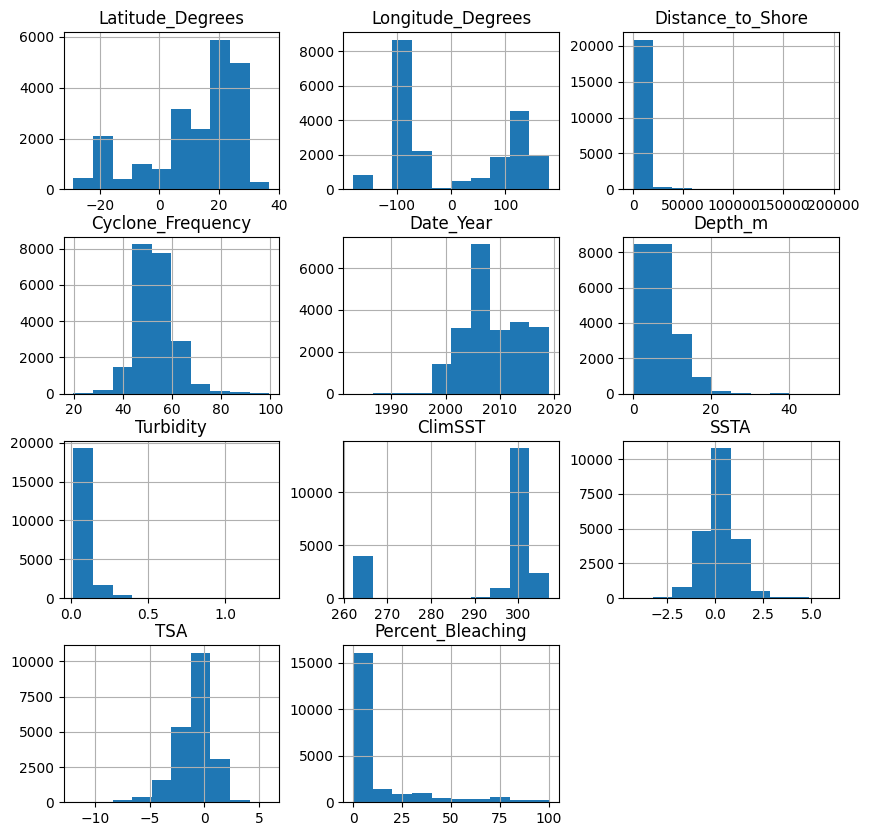

In [8]:
cols_for_reg.hist(figsize=(10,10))
plt.show()

In [9]:
columns_to_transform = ['Percent_Bleaching', 'Turbidity', 'Depth_m', 'Distance_to_Shore', 'ClimSST']
cols_for_reg[columns_to_transform] = np.log(cols_for_reg[columns_to_transform]+1)

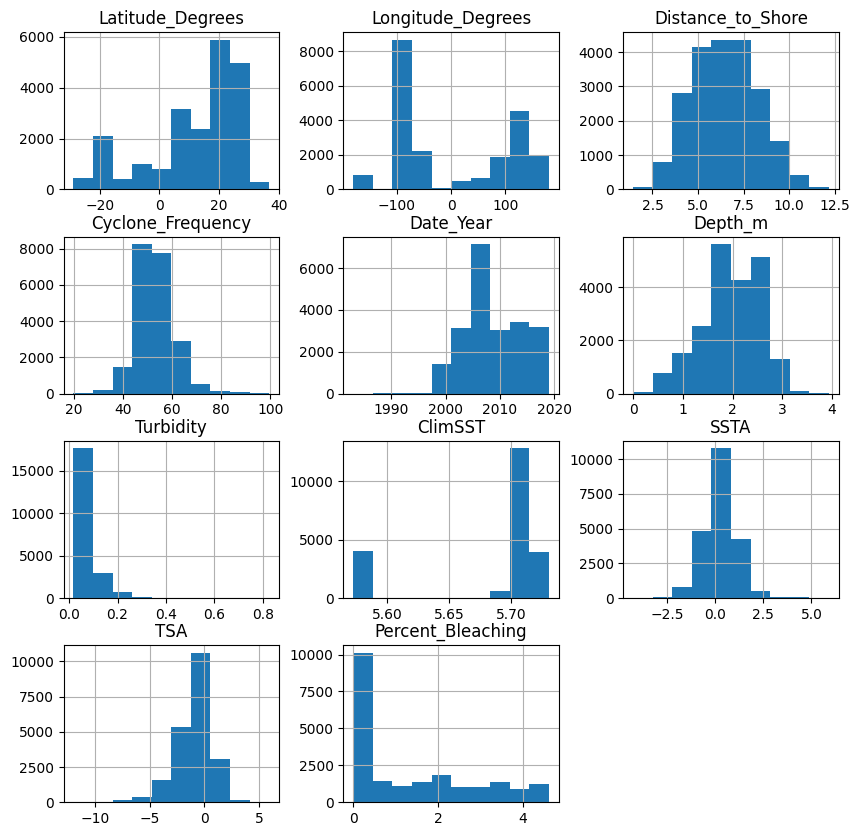

In [10]:
cols_for_reg.hist(figsize=(10,10))
plt.show()

In [11]:
X = cols_for_reg.drop(columns=['Percent_Bleaching'], axis=1)
y = cols_for_reg['Percent_Bleaching']

In [12]:
# Split cols_for_reg
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train the model
model = RandomForestRegressor()
# model = LinearRegression()
model.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
y_pred = model.predict(X_test)

# Calculate mean squared error in original scale
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error in Original Scale: {mse}")

Mean Squared Error in Original Scale: 0.5817549952979238


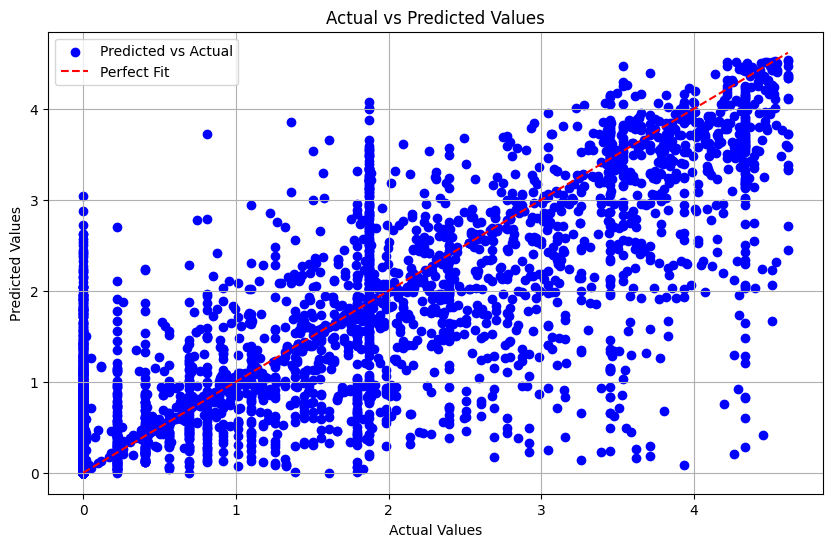

In [15]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
param_grid = {
    'n_estimators': [100, 200, 300],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}

In [17]:


# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Predict and evaluate on the test set
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: ", mse)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
cols_for_reg['Percent_Bleaching'].value_counts()

Percent_Bleaching
0.000000    9064
1.871802     739
0.223144     438
0.693147     382
4.330733     344
            ... 
2.257588       1
2.250239       1
2.249184       1
2.247072       1
4.587210       1
Name: count, Length: 2137, dtype: int64

In [ ]:
# Train the XGBoost model
weights = np.where(y_train < 1, 1, 10)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train, sample_weight=weights)

# Predict using XGBoost model
xgb_pred = xgb_model.predict(X_test)
# xgb_pred = 2 ** xgb_pred_transformed  # Reverse the transformation
# xgb_pred = np.power(2, xgb_pred_transformed) # Reverse the transformation
# xgb_pred = np.power(xgb_pred_transformed, 3) # Reverse the transformation
# xgb_pred = xgb_pred_transformed ** 1/2  # Reverse the transformation
# xgb_pred = np.log(xgb_pred_transformed + 1) # Reverse the transformation
# xgb_pred = np.exp(xgb_pred_transformed) # Reverse the transformation


# y_test_original = 2 ** y_test
# y_test_original = np.power(2, y_test) 
# y_test_original = np.power(y_test, 3) 
# y_test_original = np.log(y_test + 1)
# y_test_original = np.exp(y_test)

# Combine predictions using a simple average
# combined_pred = (rf_pred + xgb_pred) / 2

# # Evaluate the combined predictions
mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.7272057625728641
Mean Squared Error (MSE): 0.8852604025013497
Root Mean Squared Error (RMSE): 0.9408827782999059
R-squared (R²): 0.5808879079225886


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.utils import plot_model
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# columns_len = int(len(cols_for_reg.columns))

In [ ]:
# model = Sequential()
# model.add(Dense(128, input_dim=columns_len-1, activation='relu', kernel_initializer='he_normal'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
# # model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
# # model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
# model.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))
# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))
# loss, acc = model.evaluate(X_test, y_test)
# print("Test Loss:", loss)
# print("Test Acc:", acc)

Epoch 1/150
535/535 [==============================] - 4s 3ms/step - loss: -258.2857 - accuracy: 0.0581 - val_loss: -1803.5999 - val_accuracy: 0.0000e+00
Epoch 2/150
535/535 [==============================] - 1s 3ms/step - loss: -3956.1548 - accuracy: 0.0180 - val_loss: -11930.9414 - val_accuracy: 0.0000e+00
Epoch 3/150
535/535 [==============================] - 1s 3ms/step - loss: -15229.5547 - accuracy: 0.0273 - val_loss: -65221.0156 - val_accuracy: 0.0000e+00
Epoch 4/150
535/535 [==============================] - 1s 3ms/step - loss: -36206.3438 - accuracy: 0.0391 - val_loss: -44530.1328 - val_accuracy: 0.0213
Epoch 5/150
535/535 [==============================] - 1s 3ms/step - loss: -69155.9609 - accuracy: 0.0462 - val_loss: -151546.1562 - val_accuracy: 0.0000e+00
Epoch 6/150
535/535 [==============================] - 1s 3ms/step - loss: -114626.7266 - accuracy: 0.0502 - val_loss: 2.1113 - val_accuracy: 0.4298
Epoch 7/150
535/535 [==============================] - 1s 3ms/step - loss

In [ ]:
# predictions = model.predict(X_test)
# predictions = (predictions > 0.5).astype(int)
# predictions_train = model.predict(X_train)
# predictions_train = (predictions_train > 0.5).astype(int)

# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# acc = accuracy_score(y_train, predictions_train)
# precision = precision_score(y_train, predictions_train)
# recall = recall_score(y_train, predictions_train)
# f1 = f1_score(y_train, predictions_train)

# print(f"Accuracy: {acc}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1 Score: {f1}")

# acc = accuracy_score(y_test, predictions)
# precision = precision_score(y_test, predictions)
# recall = recall_score(y_test, predictions)
# f1 = f1_score(y_test, predictions)

# print('\n')
# print(f"Accuracy: {acc}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1 Score: {f1}")

535/535 [==============================] - 1s 2ms/step


ValueError: Classification metrics can't handle a mix of continuous and binary targets